In [1]:
import pandas as pd

datos_llegada_aviones = pd.read_csv('DatosLlegadaAviones.csv')
datos_pasajeros = pd.read_csv('DatosPasajeros.csv')
tiempo_de_servicio_biometrico = pd.read_csv('TiempoDeServicioBiométrico.csv')

In [2]:
datos_llegada_aviones.head()

,Fecha de Llegada,Tipo de Avión,Tiempo entre Arribos (segundos)
0,5/1/23 0:00,Mediano,"0,0"
1,5/1/23 0:12,Grande,"768,5330831"
2,5/1/23 0:20,Mediano,"463,3858478"
3,5/1/23 0:31,Pequeño,"676,7218682"
4,5/1/23 0:40,Pequeño,"501,1552083"


In [3]:
total_aviones = datos_llegada_aviones.shape[0]

conteo_tipos_avion = datos_llegada_aviones['Tipo de Avión'].value_counts()

probabilidades_tipos_avion = conteo_tipos_avion / total_aviones

print("Probabilidad de que el avión que acaba de aterrizar sea:")
for tipo_avion, probabilidad in probabilidades_tipos_avion.items():
    print(f"{tipo_avion}: {probabilidad:.4f}")


Probabilidad de que el avión que acaba de aterrizar sea:
Mediano: 0.5997
Grande: 0.3004
Pequeño: 0.0999


In [4]:
datos_llegada_aviones['Fecha de Llegada'] = pd.to_datetime(datos_llegada_aviones['Fecha de Llegada'], format='%m/%d/%y %H:%M')
datos_llegada_aviones['Tiempo entre Arribos (segundos)'] = datos_llegada_aviones['Tiempo entre Arribos (segundos)'].str.replace(',', '.')
datos_llegada_aviones['Tiempo entre Arribos (segundos)'] = datos_llegada_aviones['Tiempo entre Arribos (segundos)'].astype(float)
datos_llegada_aviones.dtypes

Fecha de Llegada                   datetime64[ns]
Tipo de Avión                              object
Tiempo entre Arribos (segundos)           float64
dtype: object

In [5]:
datos_pasajeros.head()

,Pasajero,Tipo de pasaporte,¿Lleva maleta?
0,1,Extranjero,Sí
1,2,Nacional no biométrico,No
2,3,Nacional no biométrico,Sí
3,4,Nacional no biométrico,Sí
4,5,Nacional no biométrico,Sí


In [6]:
total_pasajeros = datos_pasajeros.shape[0]

conteo_tipos_pasaporte = datos_pasajeros['Tipo de pasaporte'].value_counts()

probabilidades_tipos_pasaporte = conteo_tipos_pasaporte / total_pasajeros

print("Probabilidad asociada al tipo de pasaporte:")
for tipo_pasaporte, probabilidad in probabilidades_tipos_pasaporte.items():
    print(f"{tipo_pasaporte}: {probabilidad:.4f}")


Probabilidad asociada al tipo de pasaporte:
Extranjero: 0.5510
Nacional no biométrico: 0.2989
Nacional biométrico: 0.1501


In [7]:
total_pasajeros = datos_pasajeros.shape[0]

pasajeros_con_maleta = datos_pasajeros['¿Lleva maleta?'].value_counts().get('Sí', 0)

probabilidad_con_maleta = pasajeros_con_maleta / total_pasajeros

print(f"Probabilidad de que el pasajero haya viajado con maleta: {probabilidad_con_maleta:.4f}")


Probabilidad de que el pasajero haya viajado con maleta: 0.7333


In [8]:
datos_pasajeros['¿Lleva maleta?'] = datos_pasajeros['¿Lleva maleta?'].map({'Sí': 1, 'No': 0})
datos_pasajeros.dtypes

Pasajero              int64
Tipo de pasaporte    object
¿Lleva maleta?        int64
dtype: object

In [9]:
tiempo_de_servicio_biometrico.head()

,Persona atendida,Tipo de pasaporte,Tiempo de servicio (minutos)
0,1,Biométrico,"0,349995124"
1,2,Biométrico,"2,046627212"
2,3,Biométrico,"0,2326117572"
3,4,Biométrico,"1,085410931"
4,5,Biométrico,"2,585408535"


In [10]:
tiempo_de_servicio_biometrico['Tiempo de servicio (minutos)'] = tiempo_de_servicio_biometrico['Tiempo de servicio (minutos)'].str.replace(',', '.')
tiempo_de_servicio_biometrico['Tiempo de servicio (minutos)'] = tiempo_de_servicio_biometrico['Tiempo de servicio (minutos)'].astype(float)
tiempo_de_servicio_biometrico.dtypes

Persona atendida                  int64
Tipo de pasaporte                object
Tiempo de servicio (minutos)    float64
dtype: object

In [11]:
len(tiempo_de_servicio_biometrico)

76203

In [12]:
import numpy as np

tiempos_biometrico = np.array(tiempo_de_servicio_biometrico['Tiempo de servicio (minutos)'] * 60)
tiempos_biometrico

array([ 20.99970744, 122.79763272,  13.95670543, ..., 227.49297972,
        46.89275024,  55.80570989])

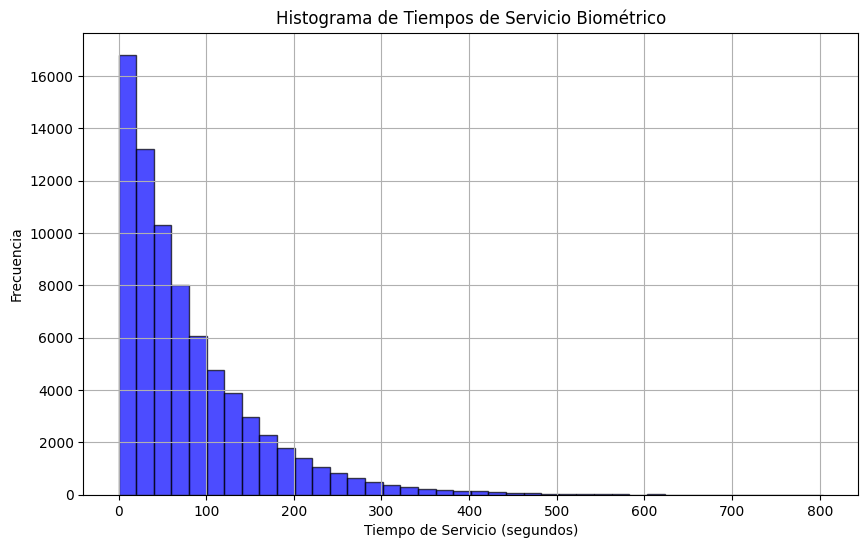

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(tiempos_biometrico, bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos de Servicio Biométrico')
plt.xlabel('Tiempo de Servicio (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

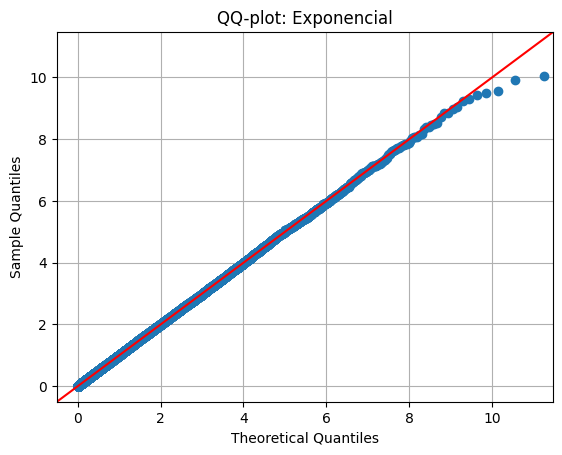

<Figure size 1200x600 with 0 Axes>

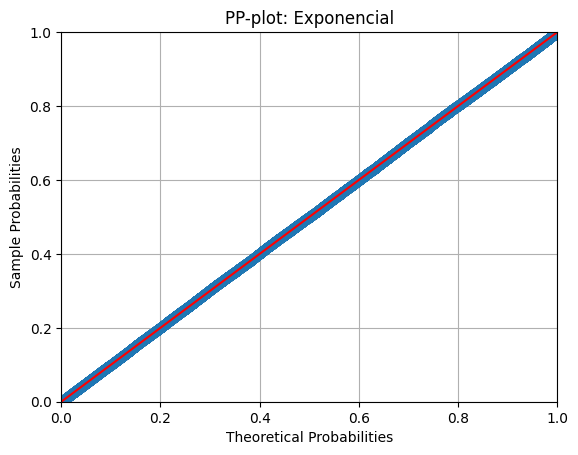

In [14]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

data = tiempos_biometrico

distributions = {
    'Exponencial': stats.expon,
}

for name, distribution in distributions.items():
    params = distribution.fit(data)

    plt.figure(figsize=(12, 6))
    sm.qqplot(data, line='45', dist=distribution, fit=True, distargs=params)
    plt.title(f'QQ-plot: {name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sm.ProbPlot(data, dist=distribution, fit=True, distargs=params).ppplot(line='45')
    plt.title(f'PP-plot: {name}')
    plt.grid(True)
    plt.show()


In [15]:
from funciones_KS_test import *

data = tiempos_biometrico

print(f"Pruebas Kolmogorov-Smirnov para los Tiempos de Servicio Biométrico")
print(f"--------------------------------------------------")

KS_test_normal(data, media=np.mean(data), desvesta=np.std(data))
KS_test_lognormal(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
KS_test_exponential(data, tasa=1/np.mean(data))
KS_test_uniform(data, minimo=np.min(data), maximo=np.max(data))
KS_test_triangular(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
KS_test_gamma(data, media=np.mean(data), varianza=np.var(data))
KS_test_weibull(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Kolmogorov-Smirnov para los Tiempos de Servicio Biométrico
--------------------------------------------------
Kolmogorov Smirnov statistic: 0.1576455284766406
p-value: 0.0
Kolmogorov Smirnov statistic: 0.4671753332156757
p-value: 0.0
Kolmogorov Smirnov statistic: 0.0025525902595768812
p-value: 0.7024912314487517
Kolmogorov Smirnov statistic: 0.671219274260259
p-value: 0.0
Kolmogorov Smirnov statistic: 0.5583171128849536
p-value: 0.0
Kolmogorov Smirnov statistic: 1.0
p-value: 0.0
Kolmogorov Smirnov statistic: 0.0025023402161873376
p-value: 0.7255482680950655


In [16]:
import scipy.stats as stats

forma_weibull, loc_weibull, escala_weibull = stats.weibull_min.fit(tiempos_biometrico, floc=0)

tasa_exponencial = 1 / np.mean(tiempos_biometrico)

print(f"Parámetros de la distribución Weibull para tiempos_biometrico:")
print(f"Forma (Shape, c): {forma_weibull}")
print(f"Ubicación (Location, loc): {loc_weibull}")
print(f"Escala (Scale, scale): {escala_weibull}")

print(f"\nParámetro de la distribución Exponencial para tiempos_biometrico:")
print(f"Tasa (Rate, λ): {tasa_exponencial}")


Parámetros de la distribución Weibull para tiempos_biometrico:
Forma (Shape, c): 1.0027399970586377
Ubicación (Location, loc): 0
Escala (Scale, scale): 80.19234184770141

Parámetro de la distribución Exponencial para tiempos_biometrico:
Tasa (Rate, λ): 0.012484391104978987


In [17]:
import pandas as pd

tiempos_franjas_np = {}

franjas_horarias = [
    ("6 am - 11 am", 6, 11),
    ("11 am - 3 pm", 11, 15),
    ("3 pm - 9 pm", 15, 21),
    ("9 pm - 6 am", 21, 6)
]

for franja, hora_inicio, hora_fin in franjas_horarias:
    if hora_inicio < hora_fin:
        subset = datos_llegada_aviones[(datos_llegada_aviones['Fecha de Llegada'].dt.hour >= hora_inicio) & 
                                       (datos_llegada_aviones['Fecha de Llegada'].dt.hour < hora_fin)]
    else:
        subset = datos_llegada_aviones[(datos_llegada_aviones['Fecha de Llegada'].dt.hour >= hora_inicio) | 
                                       (datos_llegada_aviones['Fecha de Llegada'].dt.hour < hora_fin)]

    tiempos_franjas_np[franja] = subset['Tiempo entre Arribos (segundos)'].values

for franja, tiempos in tiempos_franjas_np.items():
    print(f"Franja: {franja}, Número de tiempos: {len(tiempos)}")


Franja: 6 am - 11 am, Número de tiempos: 1046
Franja: 11 am - 3 pm, Número de tiempos: 1289
Franja: 3 pm - 9 pm, Número de tiempos: 1021
Franja: 9 pm - 6 am, Número de tiempos: 1018


In [18]:
tiempos_6_11 = tiempos_franjas_np["6 am - 11 am"]
tiempos_11_3 = tiempos_franjas_np["11 am - 3 pm"]
tiempos_3_9 = tiempos_franjas_np["3 pm - 9 pm"]
tiempos_9_6 = tiempos_franjas_np["9 pm - 6 am"]

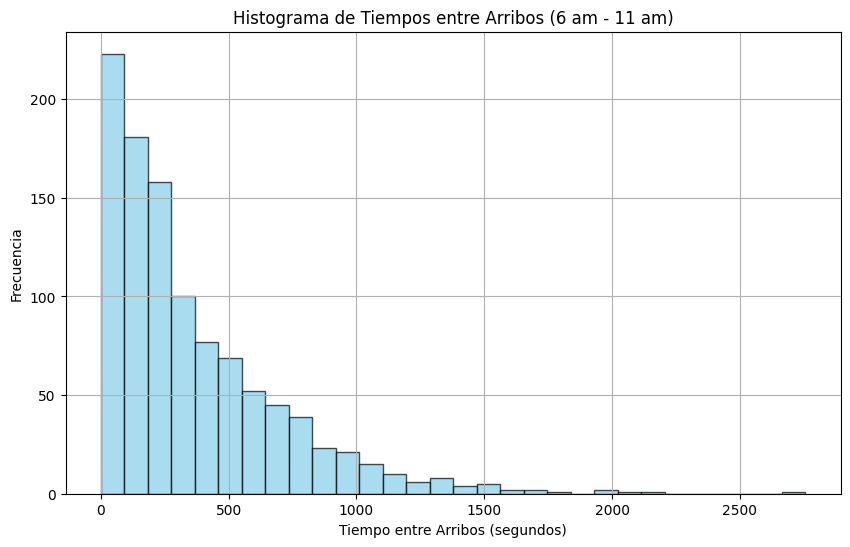

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(tiempos_6_11, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos entre Arribos (6 am - 11 am)')
plt.xlabel('Tiempo entre Arribos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


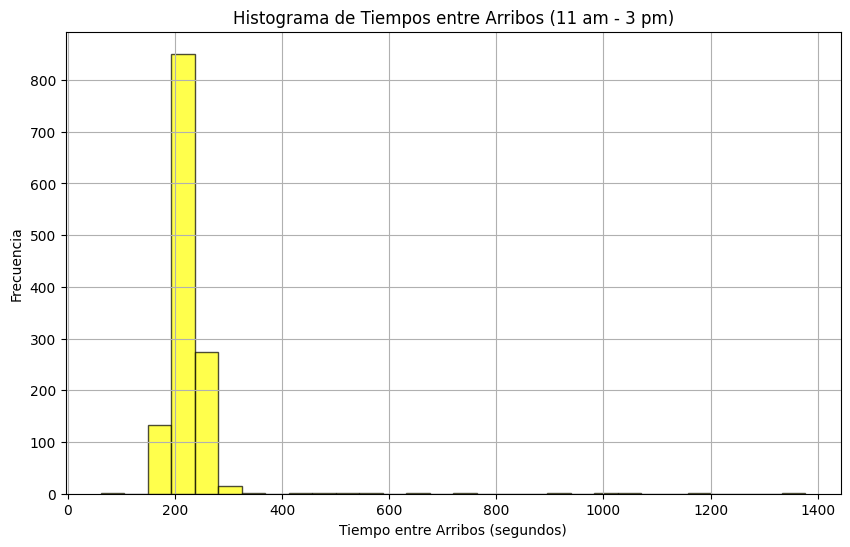

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(tiempos_11_3, bins=30, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos entre Arribos (11 am - 3 pm)')
plt.xlabel('Tiempo entre Arribos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

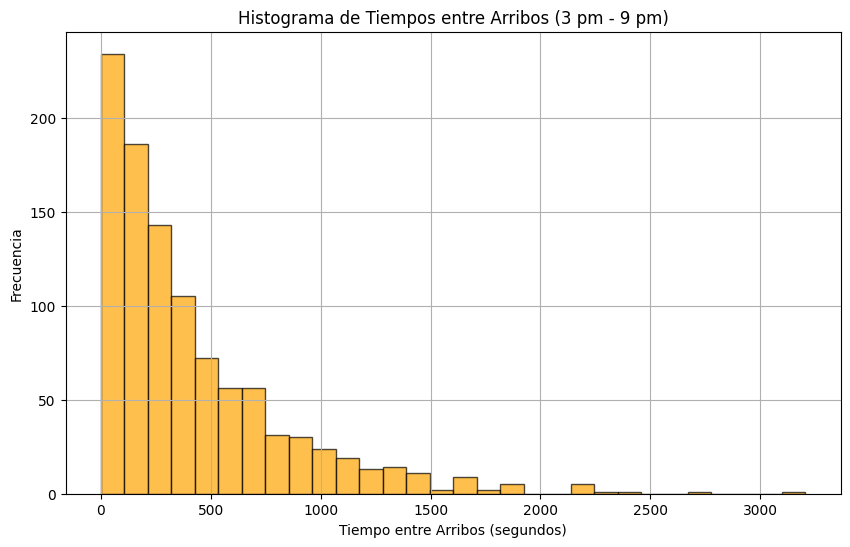

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(tiempos_3_9, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos entre Arribos (3 pm - 9 pm)')
plt.xlabel('Tiempo entre Arribos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

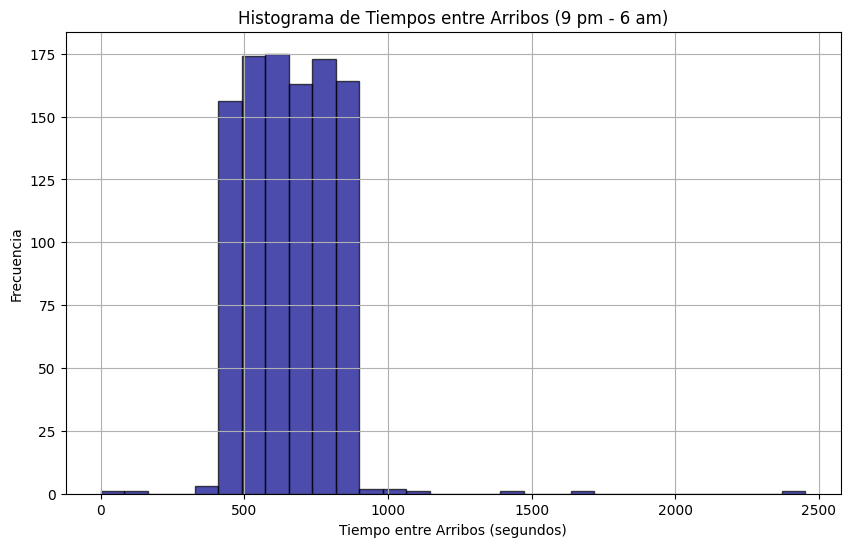

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(tiempos_9_6, bins=30, color='darkblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos entre Arribos (9 pm - 6 am)')
plt.xlabel('Tiempo entre Arribos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [23]:
import numpy as np

def eliminar_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

def eliminar_outliers_estricto(data, lower_bound=400, upper_bound=900):
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [24]:
tiempos_11_3 = eliminar_outliers(tiempos_11_3)
tiempos_9_6 = eliminar_outliers_estricto(tiempos_9_6)

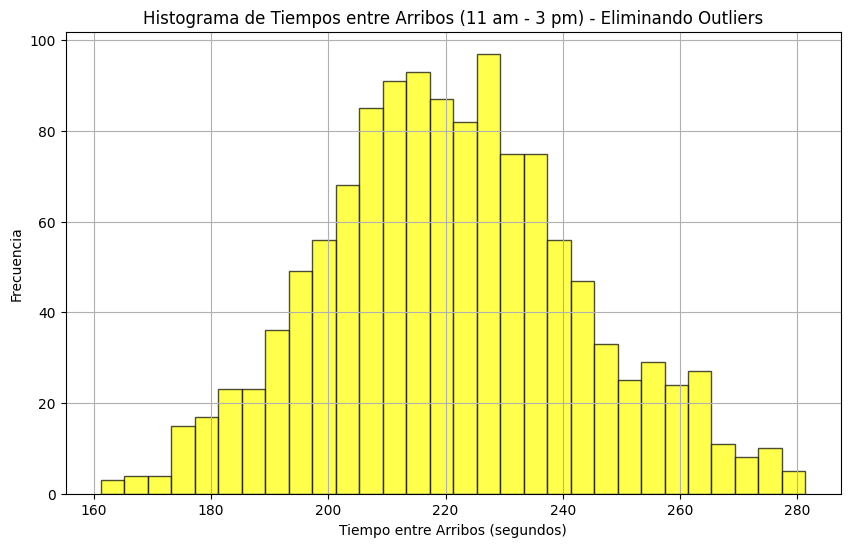

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(tiempos_11_3, bins=30, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos entre Arribos (11 am - 3 pm) - Eliminando Outliers')
plt.xlabel('Tiempo entre Arribos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

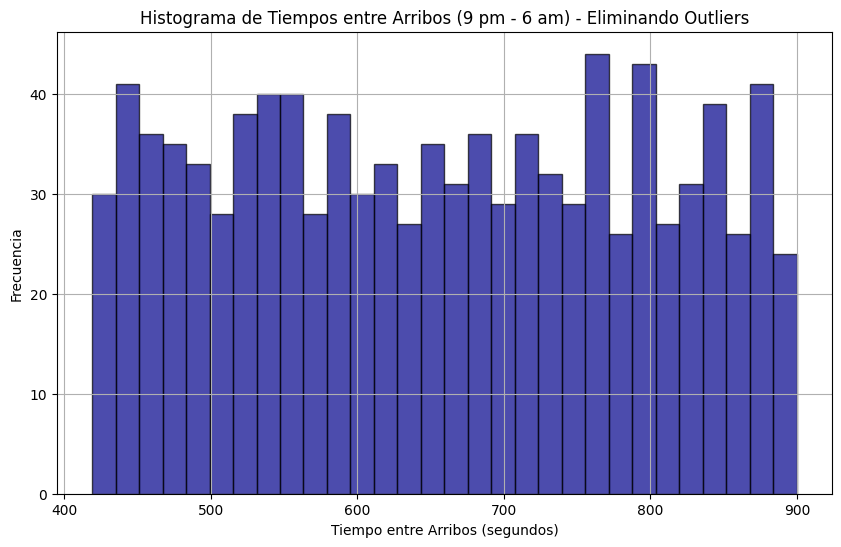

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(tiempos_9_6, bins=30, color='darkblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Tiempos entre Arribos (9 pm - 6 am) - Eliminando Outliers')
plt.xlabel('Tiempo entre Arribos (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

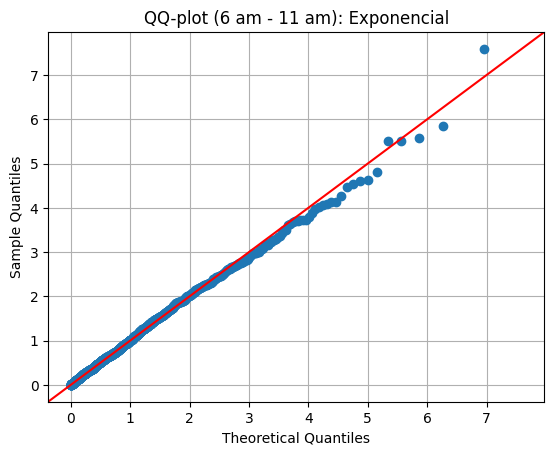

<Figure size 1200x600 with 0 Axes>

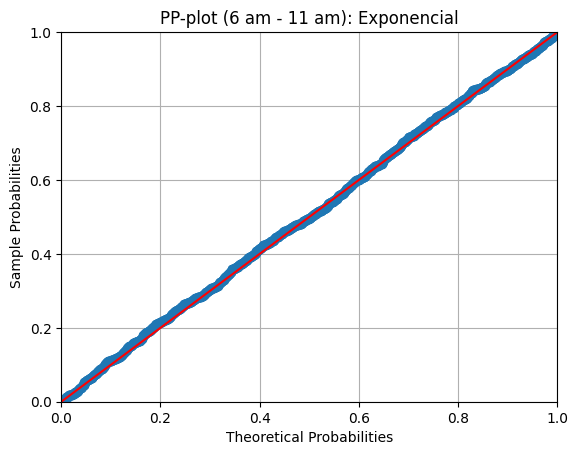

In [27]:
import statsmodels.api as sm
import scipy.stats as stats

data = tiempos_6_11

distributions = {
    'Exponencial': stats.expon,
}

for name, distribution in distributions.items():
    params = distribution.fit(data)

    plt.figure(figsize=(12, 6))
    sm.qqplot(data, line='45', dist=distribution, fit=True, distargs=params)
    plt.title(f'QQ-plot (6 am - 11 am): {name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sm.ProbPlot(data, dist=distribution, fit=True, distargs=params).ppplot(line='45')
    plt.title(f'PP-plot (6 am - 11 am): {name}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

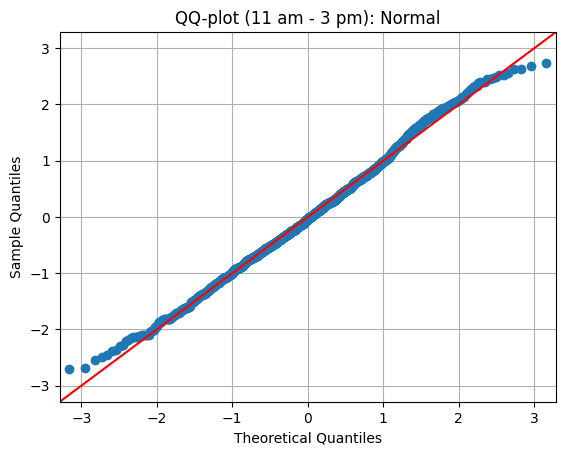

<Figure size 1200x600 with 0 Axes>

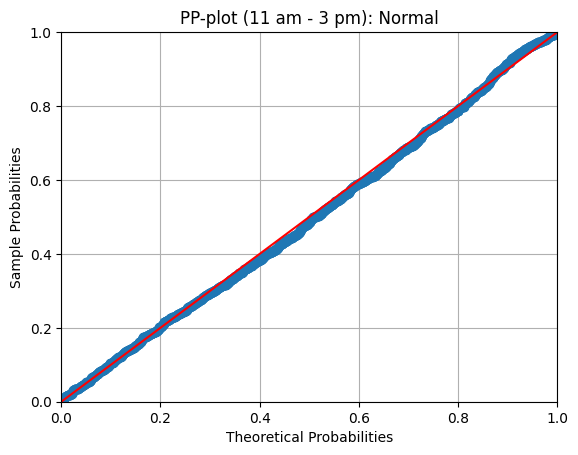

In [28]:
data = tiempos_11_3

distributions = {
    'Normal': stats.norm
}

for name, distribution in distributions.items():
    params = distribution.fit(data)

    plt.figure(figsize=(12, 6))
    sm.qqplot(data, line='45', dist=distribution, fit=True, distargs=params)
    plt.title(f'QQ-plot (11 am - 3 pm): {name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sm.ProbPlot(data, dist=distribution, fit=True, distargs=params).ppplot(line='45')
    plt.title(f'PP-plot (11 am - 3 pm): {name}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

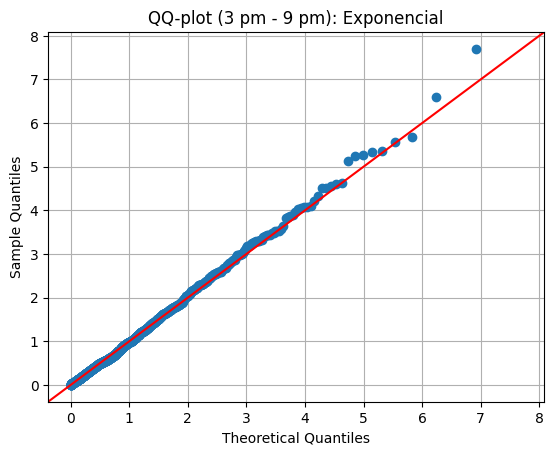

<Figure size 1200x600 with 0 Axes>

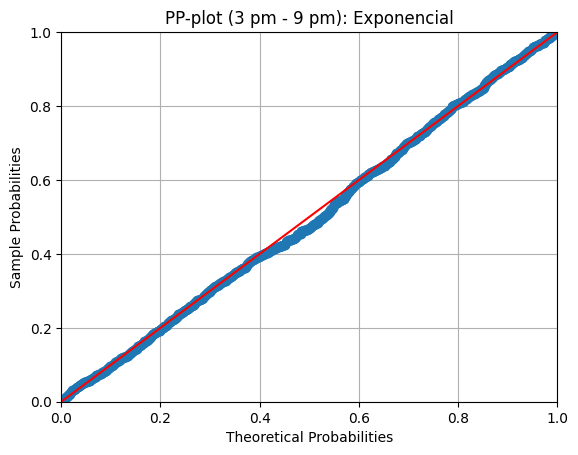

In [29]:
data = tiempos_3_9

distributions = {
    'Exponencial': stats.expon,
}

for name, distribution in distributions.items():
    params = distribution.fit(data)

    plt.figure(figsize=(12, 6))
    sm.qqplot(data, line='45', dist=distribution, fit=True, distargs=params)
    plt.title(f'QQ-plot (3 pm - 9 pm): {name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sm.ProbPlot(data, dist=distribution, fit=True, distargs=params).ppplot(line='45')
    plt.title(f'PP-plot (3 pm - 9 pm): {name}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

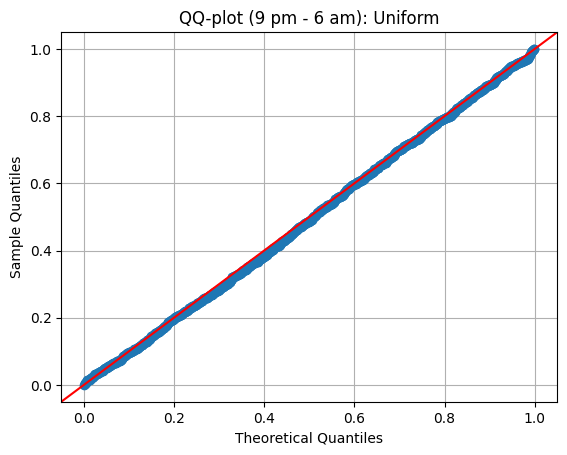

<Figure size 1200x600 with 0 Axes>

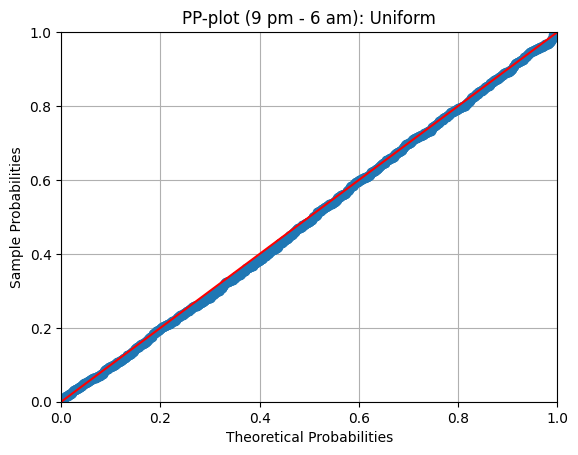

In [30]:
data = tiempos_9_6

distributions = {
    'Uniform': stats.uniform
}

for name, distribution in distributions.items():
    params = distribution.fit(data)

    plt.figure(figsize=(12, 6))
    sm.qqplot(data, line='45', dist=distribution, fit=True, distargs=params)
    plt.title(f'QQ-plot (9 pm - 6 am): {name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sm.ProbPlot(data, dist=distribution, fit=True, distargs=params).ppplot(line='45')
    plt.title(f'PP-plot (9 pm - 6 am): {name}')
    plt.grid(True)
    plt.show()


In [31]:
from funciones_KS_test import *
from funcioneschicuadrado_continuas import *

In [32]:

data = tiempos_6_11

print(f"Pruebas Kolmogorov-Smirnov para la franja horaria: 6 am - 11 am")
print(f"--------------------------------------------------")

KS_test_normal(data, media=np.mean(data), desvesta=np.std(data))
KS_test_lognormal(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
KS_test_exponential(data, tasa=1/np.mean(data))
KS_test_uniform(data, minimo=np.min(data), maximo=np.max(data))
KS_test_triangular(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
KS_test_gamma(data, media=np.mean(data), varianza=np.var(data))
KS_test_weibull(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Kolmogorov-Smirnov para la franja horaria: 6 am - 11 am
--------------------------------------------------
Kolmogorov Smirnov statistic: 0.14914189452300236
p-value: 8.949115774445505e-21
Kolmogorov Smirnov statistic: 0.5356904940629634
p-value: 4.3441032464198066e-281
Kolmogorov Smirnov statistic: 0.0199373057601403
p-value: 0.7922075056101434
Kolmogorov Smirnov statistic: 0.6027344881663073
p-value: 0.0
Kolmogorov Smirnov statistic: 0.47956775975410454
p-value: 1.005591080187605e-221
Kolmogorov Smirnov statistic: 1.0
p-value: 0.0
Kolmogorov Smirnov statistic: 0.017436444669034712
p-value: 0.9025114064504356


In [33]:
import scipy.stats as stats

forma_weibull, loc_weibull, escala_weibull = stats.weibull_min.fit(tiempos_6_11, floc=0)

tasa_exponencial = 1 / np.mean(tiempos_6_11)

print(f"Parámetros de la distribución Weibull para tiempos_6_11:")
print(f"Forma (Shape, c): {forma_weibull}")
print(f"Ubicación (Location, loc): {loc_weibull}")
print(f"Escala (Scale, scale): {escala_weibull}")

print(f"\nParámetro de la distribución Exponencial para tiempos_6_11:")
print(f"Tasa (Rate, λ): {tasa_exponencial}")

Parámetros de la distribución Weibull para tiempos_6_11:
Forma (Shape, c): 1.0315529115025424
Ubicación (Location, loc): 0
Escala (Scale, scale): 367.8671489034865

Parámetro de la distribución Exponencial para tiempos_6_11:
Tasa (Rate, λ): 0.0027527502244728682


In [34]:

data = tiempos_6_11

print(f"Pruebas Chi-Cuadrado para la franja horaria: 6 am - 11 am")
print(f"--------------------------------------------------")

chi_square_normal_goodness_of_fit(data, media=np.mean(data), desvesta=np.std(data))
chi_square_lognormal_goodness_of_fit(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
chi_square_exponential_goodness_of_fit(data, tasa=1/np.mean(data))
chi_square_uniform_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data))
chi_square_triangular_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
chi_square_gamma_goodness_of_fit(data, media=np.mean(data), varianza=np.var(data))
chi_square_weibull_goodness_of_fit(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Chi-Cuadrado para la franja horaria: 6 am - 11 am
--------------------------------------------------
Chi-squared statistic: 824.2562095748677
p-value: 0.0
Chi-squared statistic: 392.22370936902416
p-value: 9.914291609902648e-14
Chi-squared statistic: 197.2103204735284
p-value: 0.6758173467609001
Chi-squared statistic: 3020.1013338578455
p-value: 0.0
Chi-squared statistic: 9701.67110635504
p-value: 0.0
Chi-squared statistic: nan
p-value: nan
Chi-squared statistic: 226.9895493149824
p-value: 0.15068693084047458


c:\Users\nuvup\Documents\Simulacion - Caso 3\funcioneschicuadrado_continuas.py:350: RuntimeWarning: divide by zero encountered in scalar divide
  chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k-1))
c:\Users\nuvup\Documents\Simulacion - Caso 3\funcioneschicuadrado_continuas.py:350: RuntimeWarning: invalid value encountered in scalar divide
  chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k-1))


In [35]:

data = tiempos_11_3

print(f"Pruebas Kolmogorov-Smirnov para la franja horaria: 11 am - 3 pm")
print(f"--------------------------------------------------")

KS_test_normal(data, media=np.mean(data), desvesta=np.std(data))
KS_test_lognormal(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
KS_test_exponential(data, tasa=1/np.mean(data))
KS_test_uniform(data, minimo=np.min(data), maximo=np.max(data))
KS_test_triangular(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
KS_test_gamma(data, media=np.mean(data), varianza=np.var(data))
KS_test_weibull(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Kolmogorov-Smirnov para la franja horaria: 11 am - 3 pm
--------------------------------------------------
Kolmogorov Smirnov statistic: 0.02307659244314464
p-value: 0.506992355989019
Kolmogorov Smirnov statistic: 0.5038564702875118
p-value: 3.584171939659804e-296
Kolmogorov Smirnov statistic: 0.5354603114827972
p-value: 0.0
Kolmogorov Smirnov statistic: 0.16838501380779552
p-value: 1.1960058623050713e-31
Kolmogorov Smirnov statistic: 0.05134888121468548
p-value: 0.0025344307470110384
Kolmogorov Smirnov statistic: 0.6993811145638755
p-value: 0.0
Kolmogorov Smirnov statistic: 0.06574457526663624
p-value: 3.591650848252734e-05


In [36]:
media_11_3 = np.mean(tiempos_11_3)
desvesta_11_3 = np.std(tiempos_11_3)

print(f"Parámetros de la distribución Normal para tiempos_11_3:")
print(f"Media: {media_11_3}")
print(f"Desviación Estandar: {desvesta_11_3}")

Parámetros de la distribución Normal para tiempos_11_3:
Media: 221.02886250190778
Desviación Estandar: 22.08488266684612


In [37]:

data = tiempos_11_3

print(f"Pruebas Chi-Cuadrado para la franja horaria: 11 am - 3 pm")
print(f"--------------------------------------------------")

chi_square_normal_goodness_of_fit(data, media=np.mean(data), desvesta=np.std(data))
chi_square_lognormal_goodness_of_fit(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
chi_square_exponential_goodness_of_fit(data, tasa=1/np.mean(data))
chi_square_uniform_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data))
chi_square_triangular_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
chi_square_gamma_goodness_of_fit(data, media=np.mean(data), varianza=np.var(data))
chi_square_weibull_goodness_of_fit(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Chi-Cuadrado para la franja horaria: 11 am - 3 pm
--------------------------------------------------
Chi-squared statistic: 277.71459788826
p-value: 0.09441819602812063
Chi-squared statistic: 236.0286168521422
p-value: 0.6972020016652134
Chi-squared statistic: 8514.814756870745
p-value: 0.0
Chi-squared statistic: 902.0174595734725
p-value: 0.0
Chi-squared statistic: 374.14557541505656
p-value: 3.075392552842615e-07
Chi-squared statistic: nan
p-value: nan
Chi-squared statistic: 261.6348395882681
p-value: 0.26396977549423495


In [38]:

data = tiempos_3_9

print(f"Pruebas Kolmogorov-Smirnov para la franja horaria: 3 pm - 9 pm")
print(f"--------------------------------------------------")

KS_test_normal(data, media=np.mean(data), desvesta=np.std(data))
KS_test_lognormal(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
KS_test_exponential(data, tasa=1/np.mean(data))
KS_test_uniform(data, minimo=np.min(data), maximo=np.max(data))
KS_test_triangular(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
KS_test_gamma(data, media=np.mean(data), varianza=np.var(data))
KS_test_weibull(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Kolmogorov-Smirnov para la franja horaria: 3 pm - 9 pm
--------------------------------------------------
Kolmogorov Smirnov statistic: 0.16350982952400456
p-value: 2.5458281737380627e-24
Kolmogorov Smirnov statistic: 0.5125644956781024
p-value: 1.7950485261169412e-249
Kolmogorov Smirnov statistic: 0.0322922380687618
p-value: 0.2323852032184588
Kolmogorov Smirnov statistic: 0.6072660987018745
p-value: 0.0
Kolmogorov Smirnov statistic: 0.48465571754998
p-value: 2.405401676575981e-221
Kolmogorov Smirnov statistic: 1.0
p-value: 0.0
Kolmogorov Smirnov statistic: 0.03115969646416672
p-value: 0.26909152543042225


In [39]:
import scipy.stats as stats

forma_weibull, loc_weibull, escala_weibull = stats.weibull_min.fit(tiempos_3_9, floc=0)

tasa_exponencial = 1 / np.mean(tiempos_3_9)

print(f"Parámetros de la distribución Weibull para tiempos_3_9:")
print(f"Forma (Shape, c): {forma_weibull}")
print(f"Ubicación (Location, loc): {loc_weibull}")
print(f"Escala (Scale, scale): {escala_weibull}")

print(f"\nParámetro de la distribución Exponencial para tiempos_3_9:")
print(f"Tasa (Rate, λ): {tasa_exponencial}")

Parámetros de la distribución Weibull para tiempos_3_9:
Forma (Shape, c): 0.9960834149992828
Ubicación (Location, loc): 0
Escala (Scale, scale): 416.4177243222632

Parámetro de la distribución Exponencial para tiempos_3_9:
Tasa (Rate, λ): 0.0023973477706223504


In [40]:

data = tiempos_3_9

print(f"Pruebas Chi-Cuadrado para la franja horaria: 3 pm - 9 pm")
print(f"--------------------------------------------------")

chi_square_normal_goodness_of_fit(data, media=np.mean(data), desvesta=np.std(data))
chi_square_lognormal_goodness_of_fit(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
chi_square_exponential_goodness_of_fit(data, tasa=1/np.mean(data))
chi_square_uniform_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data))
chi_square_triangular_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
chi_square_gamma_goodness_of_fit(data, media=np.mean(data), varianza=np.var(data))
chi_square_weibull_goodness_of_fit(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Chi-Cuadrado para la franja horaria: 3 pm - 9 pm
--------------------------------------------------
Chi-squared statistic: 939.3212488717342
p-value: 0.0
Chi-squared statistic: 312.6924583741436
p-value: 7.399495436377634e-07
Chi-squared statistic: 216.9882420157088
p-value: 0.223333190813364
Chi-squared statistic: 3158.694412436861
p-value: 0.0
Chi-squared statistic: 8407.918635409804
p-value: 0.0
Chi-squared statistic: nan
p-value: nan
Chi-squared statistic: 259.93174355366654
p-value: 0.0032109074345224586


In [41]:

data = tiempos_9_6

print(f"Pruebas Kolmogorov-Smirnov para la franja horaria: 9 pm - 6 am")
print(f"--------------------------------------------------")

KS_test_normal(data, media=np.mean(data), desvesta=np.std(data))
KS_test_lognormal(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
KS_test_exponential(data, tasa=1/np.mean(data))
KS_test_uniform(data, minimo=np.min(data), maximo=np.max(data))
KS_test_triangular(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
KS_test_gamma(data, media=np.mean(data), varianza=np.var(data))
KS_test_weibull(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Kolmogorov-Smirnov para la franja horaria: 9 pm - 6 am
--------------------------------------------------
Kolmogorov Smirnov statistic: 0.0680898790794151
p-value: 0.00016860122288312642
Kolmogorov Smirnov statistic: 0.5258444441254122
p-value: 9.9308643497234e-260
Kolmogorov Smirnov statistic: 0.47228531062010287
p-value: 1.8615026404181196e-206
Kolmogorov Smirnov statistic: 0.019716880483913513
p-value: 0.8214712364454761
Kolmogorov Smirnov statistic: 0.13744293372746827
p-value: 4.8764907304371315e-17
Kolmogorov Smirnov statistic: 1.0
p-value: 0.0
Kolmogorov Smirnov statistic: 0.07418158863538937
p-value: 2.9257775932658513e-05


In [42]:
minimo_9_6 = np.min(tiempos_9_6)
maximo_9_6 = np.max(tiempos_9_6)

print(f"Parámetros de la distribución Uniforme para tiempos_11_3:")
print(f"Mínimo: {minimo_9_6}")
print(f"Máximo: {maximo_9_6}")

Parámetros de la distribución Uniforme para tiempos_11_3:
Mínimo: 419.1028879
Máximo: 899.9000374


In [43]:

data = tiempos_9_6

print(f"Pruebas Chi-Cuadrado para la franja horaria: 9 pm - 6 am")
print(f"--------------------------------------------------")

chi_square_normal_goodness_of_fit(data, media=np.mean(data), desvesta=np.std(data))
chi_square_lognormal_goodness_of_fit(data, media=np.mean(np.log(data)), desvesta=np.std(np.log(data)))
chi_square_exponential_goodness_of_fit(data, tasa=1/np.mean(data))
chi_square_uniform_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data))
chi_square_triangular_goodness_of_fit(data, minimo=np.min(data), maximo=np.max(data), moda=np.median(data))
chi_square_gamma_goodness_of_fit(data, media=np.mean(data), varianza=np.var(data))
chi_square_weibull_goodness_of_fit(data, forma=stats.weibull_min.fit(data, floc=0)[0], escala=stats.weibull_min.fit(data, floc=0)[2])

print(f"==================================================")


Pruebas Chi-Cuadrado para la franja horaria: 9 pm - 6 am
--------------------------------------------------
Chi-squared statistic: 508.68289763904227
p-value: 0.0
Chi-squared statistic: 525.276341948309
p-value: 0.0
Chi-squared statistic: 2973.8300149352767
p-value: 0.0
Chi-squared statistic: 181.6182853129965
p-value: 0.7919861160862725
Chi-squared statistic: 2073.718876418499
p-value: 0.0
Chi-squared statistic: nan
p-value: nan
Chi-squared statistic: 428.2685134656817
p-value: 0.0
